# Case: Previsão do preço de imóveis no Rio de Janeiro utilizando regressão

## Contexto
O mercado imobiliário é um importante setor da economia brasileira, e a previsão do preço de imóveis é uma questão relevante tanto para compradores quanto para vendedores. Neste caso, o objetivo é desenvolver um modelo de regressão para prever o preço de imóveis na cidade do Rio de Janeiro, utilizando dados públicos disponíveis.

## Base de dados
O Inside Airbnb (http://insideairbnb.com/get-the-data.html) oferece dados sobre anúncios de acomodações no Airbnb, incluindo informações sobre localização, tipo de imóvel, número de quartos e preços. É possível utilizar esses dados para modelar o preço dos imóveis no Rio de Janeiro, filtrando as informações relevantes para o contexto local.

## Aplicação de Ciência de Dados

### 1. Coleta e limpeza de dados
Baixe o arquivo "listings.csv" referente à cidade do Rio de Janeiro no Inside Airbnb. Em seguida, realize a limpeza dos dados removendo entradas duplicadas, tratando valores ausentes e convertendo variáveis categóricas em numéricas.
 - bronze: dado coletado em formato legivel (.parquet)
 - silver: dado filtrado ou convertido em formato (string -> date)
 - gold: dado do imóvel (id, preço, quantidade de quartos)

### 2. Análise exploratória de dados (EDA)
A EDA é realizada para identificar padrões, tendências e correlações entre as variáveis. Por exemplo, verificar a distribuição dos preços dos imóveis, identificar quais bairros possuem os imóveis mais caros e analisar a relação entre o tamanho do imóvel e o preço.

### 3. Feature engineering
Crie novas variáveis relevantes, como a distância até o centro da cidade ou a presença de comércio e serviços nas proximidades. Essas variáveis podem ajudar a melhorar o desempenho do modelo de regressão.

### 4. Modelagem e algoritmos
Separe a base de dados em conjuntos de treinamento e teste. Treine diferentes modelos de regressão, como regressão linear, árvores de decisão e regressão de floresta aleatória (Random Forest). Utilize validação cruzada para avaliar o desempenho dos modelos e selecione aquele com a melhor performance.

### 5. Avaliação e interpretação
Avalie o modelo selecionado utilizando métricas de desempenho, como o erro médio quadrático (RMSE) e o coeficiente de determinação (R²). Interprete os resultados, identificando os fatores que mais influenciam o preço dos imóveis e fornecendo insights para os interessados no mercado imobiliário.

Dessa forma, é possível criar um modelo de regressão para prever o preço de imóveis no Rio de Janeiro utilizando dados disponíveis e técnicas de ciência de dados.


#### Carregando os Dados

In [1]:
import pandas as pd
import gzip

Mounted at /content/drive


In [2]:
mount_path = "/workspaces/prediction_house_price_from_airbnb/Data/Raw/"

In [4]:
listing = pd.read_csv(mount_path + "listings.csv")
neighbourhoods = pd.read_csv(mount_path + "neighbourhoods.csv")
review = pd.read_csv(mount_path + "reviews.csv")


In [ ]:
def read_gz(file_name:str)->pd.DataFrame:
    with gzip.open(mount_path + file_name, 'rt') as f:
        return pd.read_csv(f)

In [6]:
# open the gzipped file for reading
with gzip.open(mount_path + 'reviews.csv.gz', 'rt') as f:
    # read the contents of the file
     reviews = pd.read_csv(f)

# open the gzipped file for reading
with gzip.open(mount_path + 'listings.csv.gz', 'rt') as g:
    # read the contents of the file
    listings = pd.read_csv(g)


# open the gzipped file for reading
with gzip.open(mount_path + 'calendar.csv.gz', 'rt') as h:
    # read the contents of the file
    calendar = pd.read_csv(h)

In [ ]:
# Salvando as bases
reviews.to_parquet(mount_path + 'data/bronze/'+'reviews.parquet')
listings.to_parquet(mount_path + 'data/bronze/'+'listings.parquet')
calendar.to_parquet(mount_path + 'data/bronze/'+'calendar.parquet')
listing.to_parquet(mount_path + 'data/bronze/'+'listing.parquet')
neighbourhoods.to_parquet(mount_path + 'data/bronze/'+'neighbourhoods.parquet')
review.to_parquet(mount_path + 'data/bronze/'+'review.parquet')


In [14]:
listings.to_csv(mount_path + 'data/listings.csv', index=False)

In [17]:
listings.head(3)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,783493769216852616,https://www.airbnb.com/rooms/783493769216852616,20221229002515,2022-12-29,city scrape,"Leme, Brasil",Apartamento aconchegante próximo à praia do Le...,NaN,https://a0.muscache.com/pictures/fe1f4b1b-a300...,491704706,https://www.airbnb.com/users/show/491704706,Felipe,2022-12-16,NaN,NaN,within a few hours,100%,67%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Leme,2.0,2.0,"['email', 'phone']",f,f,NaN,Leme,NaN,-22.96421,-43.171600,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Dedicated workspace"", ""Kitchen"", ""Fi...",$720.00,1,365,1,1,365,365,1.0,365.0,NaN,t,27,57,87,362,2022-12-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
1,703973293620197060,https://www.airbnb.com/rooms/703973293620197060,20221229002515,2022-12-29,city scrape,Suíte com entrada independente em casarão 1,"Casa ampla, em excelente localização, situada ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,20362236,https://www.airbnb.com/users/show/20362236,Júlio Cesar,2014-08-21,"Rio de Janeiro, Brazil",NaN,within an hour,70%,100%,f,https://a0.muscache.com/im/users/20362236/prof...,https://a0.muscache.com/im/users/20362236/prof...,Botafogo,4.0,5.0,"['email', 'phone']",t,t,NaN,Botafogo,NaN,-22.95792,-43.182226,Private room in bed and breakfast,Private room,2,NaN,1 private bath,1.0,1.0,"[""Wifi"", ""Lock on bedroom door"", ""TV"", ""Coffee...",$599.00,4,365,4,4,365,365,4.0,365.0,NaN,t,28,58,88,363,2022-12-29,1,1,0,2022-09-06,2022-09-06,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,t,4,0,4,0,0.26
2,782895997622988215,https://www.airbnb.com/rooms/782895997622988215,20221229002515,2022-12-29,city scrape,Apartamento próximo ao metrô,Sua família vai estar perto de tudo ao ficar n...,NaN,https://a0.muscache.com/pictures/d48a6798-d1c8...,302417043,https://www.airbnb.com/users/show/302417043,Laís,2019-10-14,"Rio de Janeiro, Brazil",NaN,within a few hours,100%,50%,f,https://a0.muscache.com/im/pictures/user/fadcf...,https://a0.muscache.com/im/pictures/user/fadcf...,Laranjeiras,1.0,1.0,"['email', 'phone']",t,t,NaN,Laranjeiras,NaN,-22.93196,-43.180180,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,1.0,"[""Cooking basics"", ""Clothing storage"", ""Washer...",$240.00,3,365,3,3,365,365,3.0,365.0,NaN,t,19,40,70,160,2022-12-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [22]:

import re

In [32]:
def extract_decimal_numbers(text):
    # The regular expression pattern to match decimal numbers
    pattern = r'\d+(\.\d+)?'
    matches = re.findall(pattern, text)
    return matches

In [38]:
extract_decimal_numbers("12 .3 test")

['', '']

In [28]:
listings['bathroom']=listings['bathrooms_text'].apply(extract_decimal_numbers)

TypeError: ignored

In [41]:
listings['bedrooms'].value_counts()

1.0     15222
2.0      7338
3.0      3258
4.0       760
5.0       245
6.0       115
7.0        35
8.0        11
9.0        10
10.0        9
11.0        4
12.0        2
17.0        1
16.0        1
15.0        1
20.0        1
30.0        1
Name: bedrooms, dtype: int64

In [42]:
df=listings

In [45]:
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(float)

<Axes: xlabel='room_type,bedrooms'>

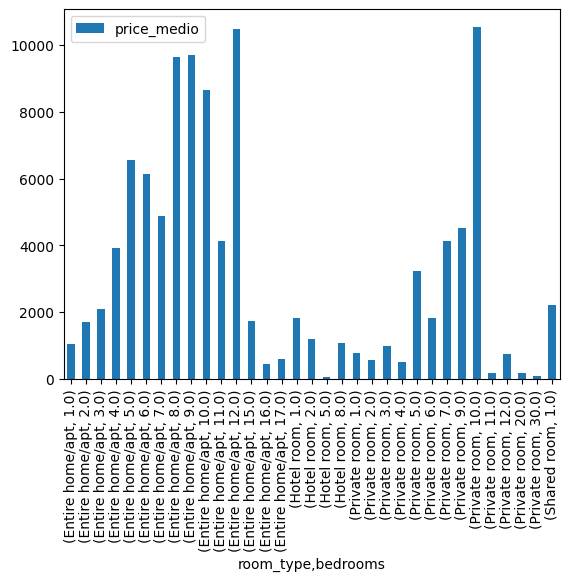

In [49]:
df.groupby(['room_type','bedrooms']).agg(price_medio=('price','mean')).plot.bar()

In [50]:
import seaborn as sns

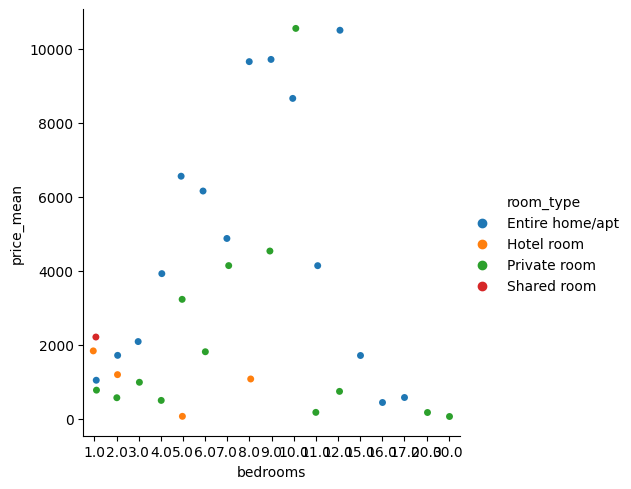

In [52]:
# group the DataFrame by room_type and bedrooms and calculate the mean of price
grouped = df.groupby(['room_type', 'bedrooms']).agg(price_mean=('price', 'mean')).reset_index()

sns.catplot(x='bedrooms', y='price_mean', hue='room_type', data=grouped)
# plot the grouped DataFrame using seaborn